<a href="https://colab.research.google.com/github/nikhil-xyz/MNIST_Dataset/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [40]:
x_train.shape

(60000, 28, 28)

In [41]:
x_test.shape

(10000, 28, 28)

In [42]:
import pandas as pd

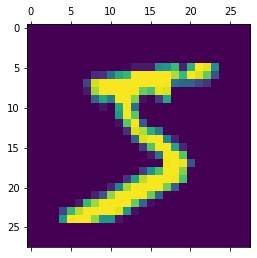

In [43]:
plt.matshow(x_train[0])

In [44]:
!pip install opencv-python
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


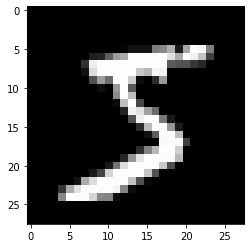

In [45]:
img = cv2.cvtColor(x_train[0], cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [46]:
x_train[0].shape

(28, 28)

In [47]:
len(x_train)

60000

In [48]:
x_train = x_train / 255
x_test = x_test / 255

In [49]:
import tensorflow as tf

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), 
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [51]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2536 - accuracy: 0.9279
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1129 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0773 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0569 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0443 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.01

In [52]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9769


[0.08448585867881775, 0.9768999814987183]

In [53]:
y_predicted = model.predict(x_test)
y_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_labels)

313/313 [==============================] - 1s 2ms/step


Text(87.0, 0.5, 'True')

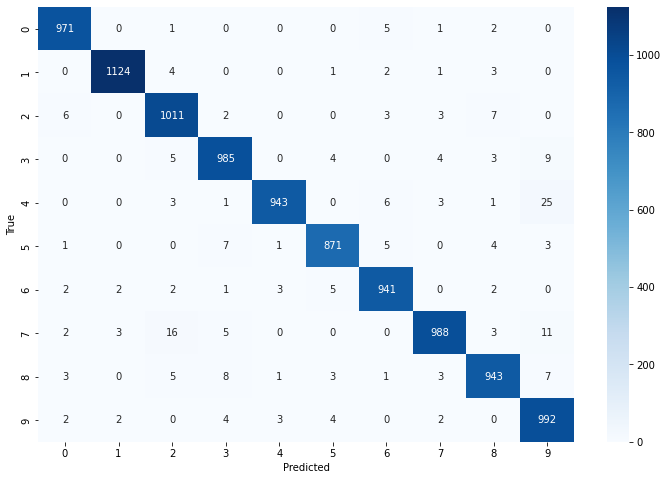

In [54]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')